Let get some data:

In [ ]:
fragile = read.csv("https://github.com/DACSS-PreProcessing/DFops_concatenating_Py/raw/refs/heads/main/allDFs.csv")

A basic look:

In [ ]:
str(fragile)

'data.frame':	3170 obs. of  16 variables:
 $ Country                        : chr  "Yemen" "Somalia" "South Sudan" "Syria" ...
 $ Year                           : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ Rank                           : chr  "1st" "2nd" "3rd" "4th" ...
 $ Total                          : num  112 111 111 111 109 ...
 $ C1_Security_Apparatus          : num  9.7 9.81 9.4 9.9 8.5 ...
 $ C2_Factionalized_Elites        : num  10 10 9.7 9.9 9.8 ...
 $ C3_Group_Grievance             : num  9.7 8.6 9.1 10 9.7 ...
 $ E1_Economy                     : num  9.4 9.1 9.5 8.69 8 ...
 $ E2_Economic_Inequality         : num  7.8 9.37 9.2 7.2 8.62 ...
 $ E3_Human_Flight_and_Brain_Drain: num  7 8.9 6.8 8.41 6.9 ...
 $ P1_State_Legitimacy            : num  9.89 8.89 9.94 9.95 9.66 ...
 $ P2_Public_Services             : num  9.5 9.1 9.5 9.1 9.46 ...
 $ P3_Human_Rights                : num  9.95 9 9 10 9.55 ...
 $ S1_Demographic_Pressures       : num  9.8 9.98 9.45 7.6

We have data about countries (index of fragility and its components). The data is several years:

In [ ]:
table(fragile$Year)


2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 
 146  177  177  177  177  177  178  178  178  178  178  178  178  178  178  179 
2022 2023 
 179  179 

Take a look:

In [ ]:
head(fragile)

,Country,Year,Rank,Total,C1_Security_Apparatus,C2_Factionalized_Elites,C3_Group_Grievance,E1_Economy,E2_Economic_Inequality,E3_Human_Flight_and_Brain_Drain,P1_State_Legitimacy,P2_Public_Services,P3_Human_Rights,S1_Demographic_Pressures,S2_Refugees_and_IDPs,X1_External_Intervention
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Yemen,2020,1st,112.4387,9.700000,10.000,9.69887,9.400000,7.800000,7.000000,9.889823,9.500000,9.950000,9.800000,9.7,10.000000
2,Somalia,2020,2nd,110.8890,9.811328,10.000,8.60000,9.100000,9.367151,8.900000,8.888107,9.100000,9.000000,9.981087,9.1,9.041286
3,South Sudan,2020,3rd,110.7522,9.400000,9.700,9.10000,9.500000,9.200000,6.800000,9.944415,9.500000,9.000000,9.450357,9.7,9.457419
4,Syria,2020,4th,110.7497,9.900000,9.900,10.00000,8.686367,7.200000,8.413343,9.950000,9.100000,10.000000,7.600000,10.0,9.999986
5,Congo Democratic Republic,2020,5th,109.3946,8.500000,9.800,9.70000,8.000000,8.619842,6.900000,9.660971,9.464911,9.548897,9.800000,10.0,9.400000
6,Central African Republic,2020,6th,107.4866,8.300000,9.682,8.00000,8.400000,9.934481,6.800000,8.879979,9.990145,9.200000,8.800000,10.0,9.500000


What **shape** does the table have? The presence of year in a column could make us think it is in a long shape.

This could be a LONG:

In [ ]:
head(fragile[,c('Country','Year','Total')])

,Country,Year,Total
,<chr>,<int>,<dbl>
1,Yemen,2020,112.4387
2,Somalia,2020,110.8890
3,South Sudan,2020,110.7522
4,Syria,2020,110.7497
5,Congo Democratic Republic,2020,109.3946
6,Central African Republic,2020,107.4866


But this is WIDE:

In [ ]:
head(fragile[fragile$Year==2023,c('Country','C1_Security_Apparatus',	'C2_Factionalized_Elites',	'C3_Group_Grievance')])

,Country,C1_Security_Apparatus,C2_Factionalized_Elites,C3_Group_Grievance
,<chr>,<dbl>,<dbl>,<dbl>
2636,Somalia,9.5,10.0,8.7
2637,Yemen,8.6,9.9,8.8
2638,South Sudan,9.9,9.2,8.6
2639,Congo Democratic Republic,8.8,9.6,9.4
2640,Syria,9.4,9.9,9.1
2641,Afghanistan,9.7,8.7,8.3


## From Long to Wide

In [ ]:
fragileWide=tidyr::pivot_wider(fragile[,c('Country','Year','Total')],names_from = Year, values_from = Total,names_sort=T)
fragileWide

Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Yemen,96.6,93.2,95.4,98.1,100.0,100.3,104.8,107.0,105.4,108.2,111.5,111.1,112.67150,113.5,112.43869,111.7,111.7,108.9
Somalia,105.9,111.1,114.2,114.7,114.3,113.4,114.9,113.9,112.6,114.0,114.0,113.4,113.20080,112.3,110.88896,110.9,110.5,111.9
South Sudan,NA,NA,NA,NA,NA,NA,108.4,110.6,112.9,114.5,113.8,113.9,113.35732,112.2,110.75219,109.4,108.4,108.5
Syria,88.6,88.6,90.1,89.8,87.9,85.9,94.5,97.4,101.6,107.8,110.8,110.6,111.39303,111.5,110.74970,110.7,108.4,107.1
Congo Democratic Republic,110.1,105.5,106.7,108.7,109.9,108.2,111.2,111.9,110.2,109.7,110.0,110.0,110.67036,110.2,109.39462,108.4,107.3,107.2
Central African Republic,97.5,101.0,103.7,105.4,106.4,105.0,103.8,105.3,110.6,111.9,112.1,112.6,111.12634,108.9,107.48660,107.0,108.1,105.7
Chad,105.9,108.8,110.9,112.2,113.3,110.3,107.6,109.0,108.7,108.4,110.1,109.4,108.31187,108.5,106.43382,105.8,105.7,104.6
Sudan,112.3,113.7,113.0,112.4,111.8,108.7,109.4,111.0,110.1,110.8,111.5,110.6,108.66319,108.0,104.76589,105.2,107.1,106.2
Afghanistan,99.8,102.3,105.4,108.2,109.3,107.5,106.0,106.7,106.5,107.9,107.9,107.3,106.62077,105.0,102.90119,102.1,105.9,106.6


Notice that for the column to be sorted properly you need to adding *names_sort*.

The wide format is useful in several cases. In general, it looks easy.

In **base R**, you can use it directly for plotting:

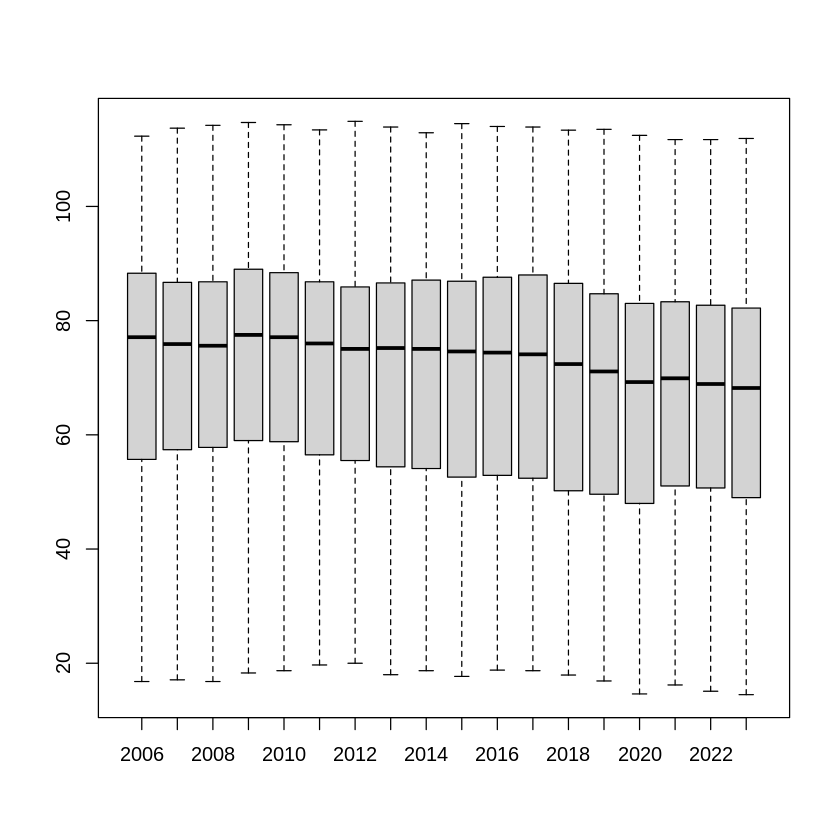

In [ ]:
boxplot(fragileWide[,-1])

BUT in others such as GGPLOT, it is troublesome to use that format:

Warning message:
“Removed 33 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


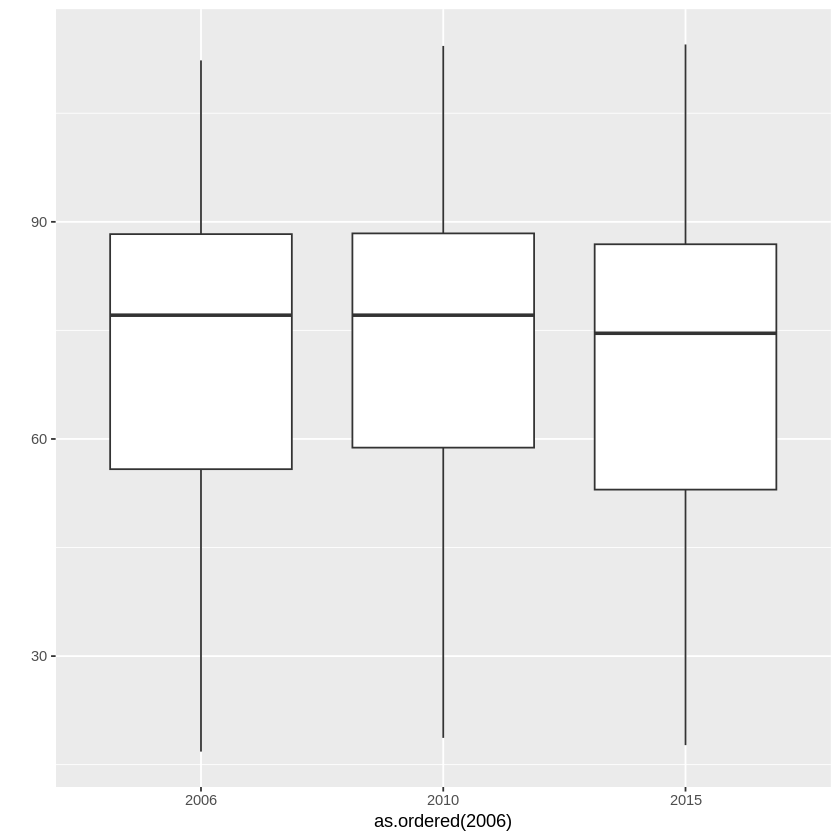

In [ ]:
library(ggplot2)
base=ggplot(fragileWide)
base+geom_boxplot(aes(x=as.ordered(2006),y=`2006`)) +
     geom_boxplot(aes(x=as.ordered(2010),y=`2010`)) +
     geom_boxplot(aes(x=as.ordered(2015),y=`2015`)) + labs(y='')

## From Wide to Long

We have  **pivot_longer** :

In [ ]:
fragileLong=tidyr::pivot_longer(fragileWide,!Country, names_to = "Year", values_to = "FragilityIndex")
fragileLong

Country,Year,FragilityIndex
<chr>,<chr>,<dbl>
Yemen,2006,96.6000
Yemen,2007,93.2000
Yemen,2008,95.4000
Yemen,2009,98.1000
Yemen,2010,100.0000
Yemen,2011,100.3000
Yemen,2012,104.8000
Yemen,2013,107.0000
Yemen,2014,105.4000


GGPLOT will work with this:

Warning message:
“Removed 52 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


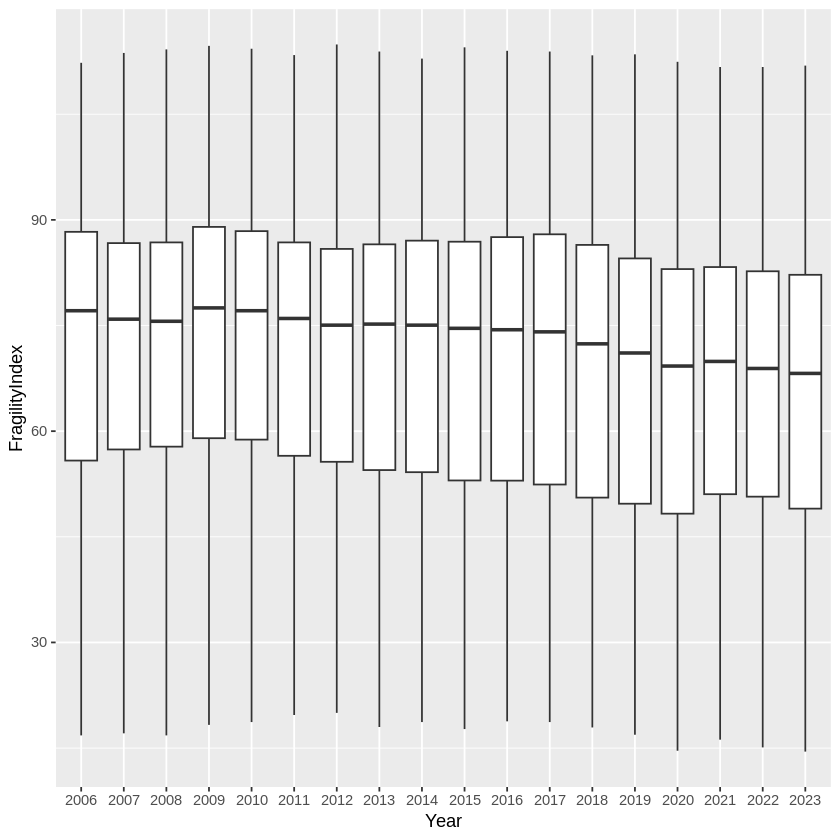

In [ ]:
base = ggplot(data=fragileLong)
base + geom_boxplot(aes(x=Year,y=FragilityIndex))


We can also use **base R**:

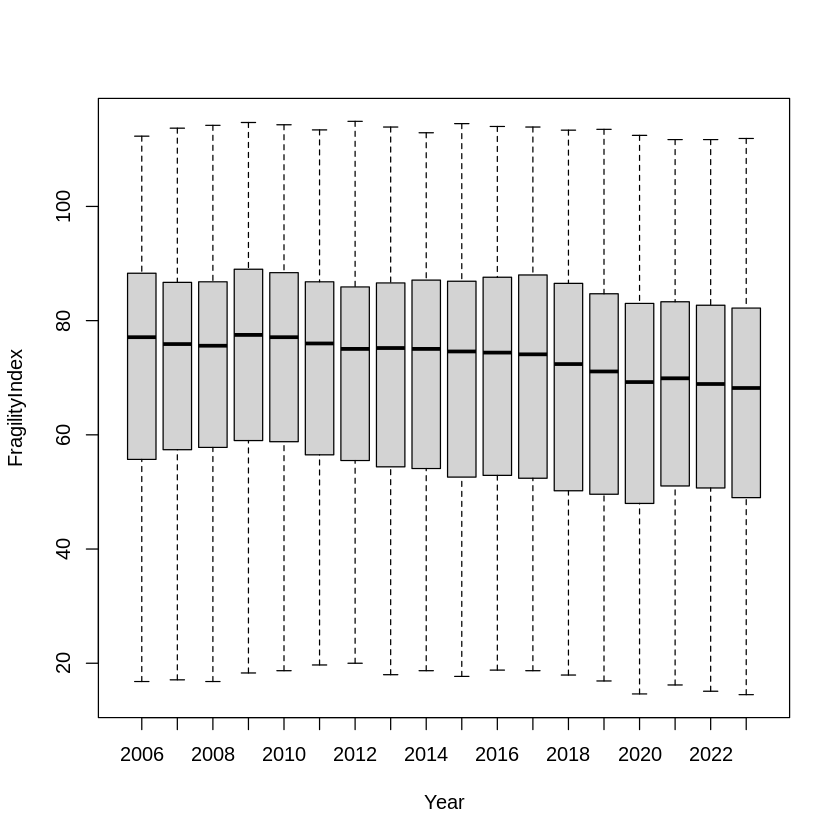

In [ ]:
boxplot(data=fragileLong,FragilityIndex~Year)

This is another example without years.

Let me keep one year, and some wide-shaped columns:

In [ ]:
CVars_columns=c('C1_Security_Apparatus',	'C2_Factionalized_Elites',	'C3_Group_Grievance')

#only one year
fragile_CVars_wide=fragile[fragile$Year==2020,c('Country',CVars_columns)]

fragile_CVars_wide

,Country,C1_Security_Apparatus,C2_Factionalized_Elites,C3_Group_Grievance
,<chr>,<dbl>,<dbl>,<dbl>
1,Yemen,9.700000,10.000,9.698870
2,Somalia,9.811328,10.000,8.600000
3,South Sudan,9.400000,9.700,9.100000
4,Syria,9.900000,9.900,10.000000
5,Congo Democratic Republic,8.500000,9.800,9.700000
6,Central African Republic,8.300000,9.682,8.000000
7,Chad,9.200000,9.500,8.300000
8,Sudan,8.377030,9.400,9.399115
9,Afghanistan,9.932963,8.900,7.500000


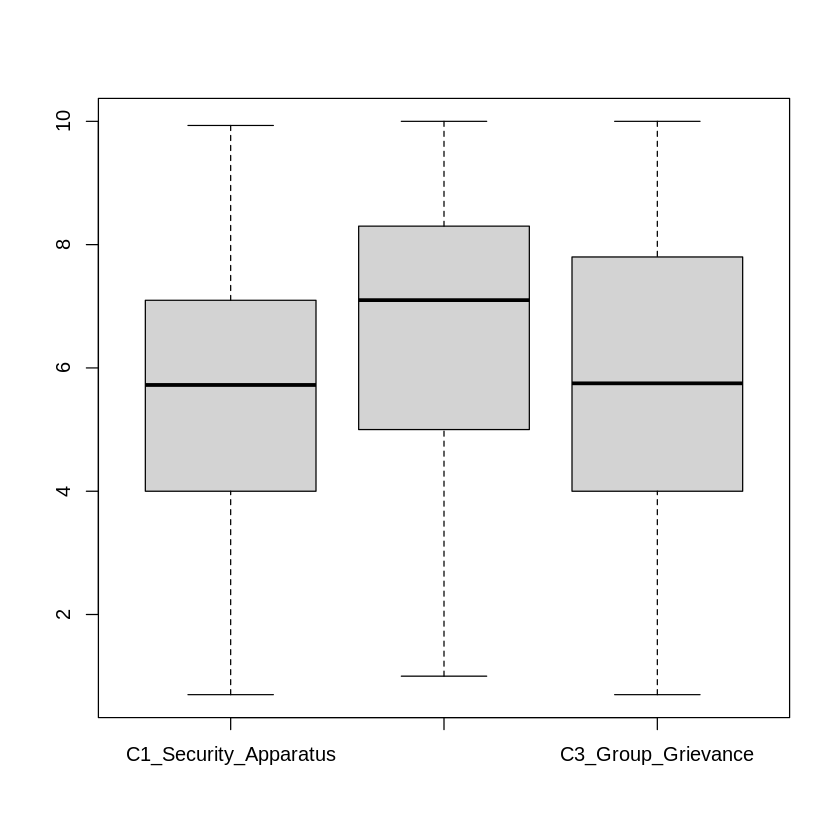

In [ ]:
boxplot(fragile_CVars_wide[,-1])

In [ ]:
fragile_CVars_long=tidyr::pivot_longer(fragile_CVars_wide,!Country, names_to = "CVars_name", values_to = "CVars_value")
fragile_CVars_long

Country,CVars_name,CVars_value
<chr>,<chr>,<dbl>
Yemen,C1_Security_Apparatus,9.700000
Yemen,C2_Factionalized_Elites,10.000000
Yemen,C3_Group_Grievance,9.698870
Somalia,C1_Security_Apparatus,9.811328
Somalia,C2_Factionalized_Elites,10.000000
Somalia,C3_Group_Grievance,8.600000
South Sudan,C1_Security_Apparatus,9.400000
South Sudan,C2_Factionalized_Elites,9.700000
South Sudan,C3_Group_Grievance,9.100000


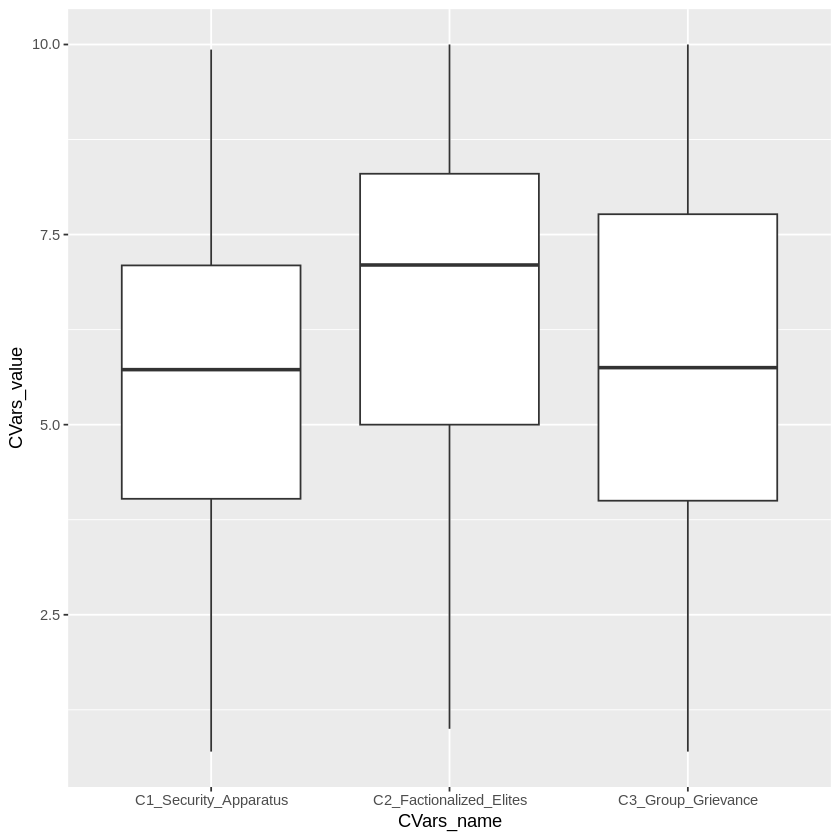

In [ ]:
base=ggplot(data=fragile_CVars_long)
base+geom_boxplot(aes(x=CVars_name,y=CVars_value))

## LONG and WIDE madness

Let me keep both long and wide elements:

In [ ]:
fragile_since2020=fragile[fragile$Year>=2020,c('Country','Year',CVars_columns)]
fragile_since2020

,Country,Year,C1_Security_Apparatus,C2_Factionalized_Elites,C3_Group_Grievance
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Yemen,2020,9.700000,10.000,9.698870
2,Somalia,2020,9.811328,10.000,8.600000
3,South Sudan,2020,9.400000,9.700,9.100000
4,Syria,2020,9.900000,9.900,10.000000
5,Congo Democratic Republic,2020,8.500000,9.800,9.700000
6,Central African Republic,2020,8.300000,9.682,8.000000
7,Chad,2020,9.200000,9.500,8.300000
8,Sudan,2020,8.377030,9.400,9.399115
9,Afghanistan,2020,9.932963,8.900,7.500000


See this result when sending a long column into a wide format when other variables are already wide:

In [ ]:
fragile_since2020_wide=tidyr::pivot_wider(fragile_since2020,names_from = Year, values_from = CVars_columns)
fragile_since2020_wide


Country,C1_Security_Apparatus_2020,C1_Security_Apparatus_2022,C1_Security_Apparatus_2021,C1_Security_Apparatus_2023,C2_Factionalized_Elites_2020,C2_Factionalized_Elites_2022,C2_Factionalized_Elites_2021,C2_Factionalized_Elites_2023,C3_Group_Grievance_2020,C3_Group_Grievance_2022,C3_Group_Grievance_2021,C3_Group_Grievance_2023
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Yemen,9.700000,9.1,9.4,8.6,10.000,10.0,10.0,9.9,9.698870,9.1,9.4,8.8
Somalia,9.811328,9.4,9.3,9.5,10.000,10.0,10.0,10.0,8.600000,8.4,8.3,8.7
South Sudan,9.400000,9.8,9.7,9.9,9.700,9.2,9.2,9.2,9.100000,8.5,8.8,8.6
Syria,9.900000,9.5,9.6,9.4,9.900,9.9,9.9,9.9,10.000000,9.4,9.7,9.1
Congo Democratic Republic,8.500000,8.7,8.6,8.8,9.800,9.6,9.5,9.6,9.700000,9.3,9.4,9.4
Central African Republic,8.300000,8.3,8.0,8.0,9.682,9.7,9.7,9.4,8.000000,8.4,8.1,8.1
Chad,9.200000,8.6,8.9,8.7,9.500,9.5,9.5,9.5,8.300000,8.4,8.0,8.1
Sudan,8.377030,8.2,8.1,8.3,9.400,9.6,9.1,9.6,9.399115,9.6,9.5,9.3
Afghanistan,9.932963,10.0,10.0,9.7,8.900,8.7,8.6,8.7,7.500000,8.2,7.2,8.3


As you saw, the conversion into the wide format changed the column names.

In [ ]:
#save your work!
write.csv(fragile_since2020_wide,'fragile_since2020_wide.csv', row.names=F )

Now, sending the wide columns next to the long column:

In [ ]:
fragile_since2020_long=tidyr::pivot_longer(fragile_since2020,!c(Country,Year),names_to = "CVars_name", values_to = "CVars_value")
fragile_since2020_long